# 자연어 처리 기초

문장을 형태소로 분리
어휘사전 구축 -> 숫자와 매핑하여 딕셔너리화
새로운 언어가 입력되었을 때, 어휘 사전에 있는 형태소만 True
CountVectorizer 각 문장에서 단어 출현 횟수를 카운팅 하는 방법
TfidfVectorize 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법

형태소 분석기 konlpy

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install konlpy

In [3]:
import os
os.environ['JAVA_HOME'] = '/Library/Java/JavaVirtualMachines/jdk-1.8.jdk/Contents/Home'

In [4]:
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()

In [5]:
text = '함께 탐험하며 성장하는 AI 학교 AIFFEL'
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [6]:
tokenizer.nouns(text)

['탐험', '학교']

In [7]:
tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [9]:
words = tokenizer.morphs(text)

In [10]:
vect.fit(words)

CountVectorizer()

In [11]:
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [12]:
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [13]:
len(vect.vocabulary_)

7

In [14]:
df_t = vect.transform(words)

In [15]:
df_t.toarray()

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [16]:
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [17]:
test = 'AI 공부하며 함께 성장해요!'

words = tokenizer.morphs(test)
words

['AI', '공부', '하며', '함께', '성장해요', '!']

In [18]:
test_t = vect.transform(words)

test_t.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [19]:
pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vect = TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [22]:
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

문제 정의 -> 탐색적 데이터 분석 -> 데이터 전처리(토큰화, 어휘 사전 구축, 인코딩) -> 모델 학습 -> 예측

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt', sep='\t')

In [24]:
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [25]:
df.shape

(150000, 3)

In [26]:
df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [27]:
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [28]:
print(df.shape)
df = df.dropna()
print(df.shape)

(150000, 3)
(149995, 3)


In [29]:
df['len'] = df['document'].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<Axes: ylabel='Frequency'>

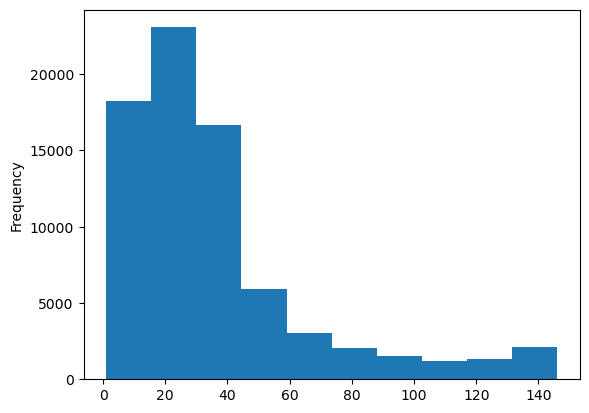

In [30]:
import matplotlib.pyplot as plt
df[df.label==0]['len'].plot(kind='hist')

<Axes: ylabel='Frequency'>

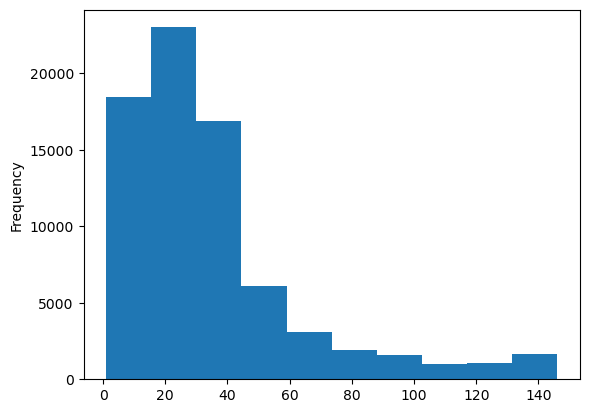

In [31]:
df[df.label==1]['len'].plot(kind='hist')

In [32]:
df = df[:1000]
df.shape

(1000, 4)

In [33]:
vect = CountVectorizer(tokenizer = tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model,vectors,df['label'], scoring='f1', cv=5).mean()

0.6634352457852256

자연어 전처리
* 어휘사전 구축
    * 00% 이상 나타나는 단어 무시
    * 최소 N개의 문장에만 나타나는 단어만 유지
* 불용어
    * 큰 의미가 없는 단어
    * 예) 을,는,이,가,여기,저기 등
* 띄어쓰기
* 반복되는 글자 정리
* 맞춤법 검사



In [35]:
vect = CountVectorizer(tokenizer = tokenizer.morphs, max_df=10)
vectors = vect.fit_transform(df['document'])

model = RandomForestClassifier(random_state=2022)
cross_val_score(model,vectors,df['label'], scoring='accuracy', cv=5).mean()

0.643

In [36]:
vect = CountVectorizer(tokenizer = tokenizer.morphs, min_df=2)
vectors = vect.fit_transform(df['document'])

model = RandomForestClassifier(random_state=2022)
cross_val_score(model,vectors,df['label'], scoring='accuracy', cv=5).mean()

0.689

In [37]:
text = '함께 탐험하며 성장하는 AI 학교 AIFFEL'
stop_words = ['하며', 'ai']
vect = CountVectorizer(stop_words = stop_words)
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 4, '탐험': 2, '성장하는': 1, '학교': 3, 'aiffel': 0}

In [38]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /private/var/folders/jd/wlq5yr_n4knc0k78z_jdh19m0000gn/T/pip-req-build-5vwfdz41
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /private/var/folders/jd/wlq5yr_n4knc0k78z_jdh19m0000gn/T/pip-req-build-5vwfdz41
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 04aeebcbe26b109486a642e57dc58665c4818cf3
  Preparing metadata (setup.py) ... done


In [39]:
!pip install git+https://github.com/jungin500/py-hanspell

  Cloning https://github.com/jungin500/py-hanspell to /private/var/folders/jd/wlq5yr_n4knc0k78z_jdh19m0000gn/T/pip-req-build-on4tvua0
  Running command git clone --filter=blob:none --quiet https://github.com/jungin500/py-hanspell /private/var/folders/jd/wlq5yr_n4knc0k78z_jdh19m0000gn/T/pip-req-build-on4tvua0
  Resolved https://github.com/jungin500/py-hanspell to commit 9cf4ce38a8d259b92dc8af3f35d7c2442e130180
  Preparing metadata (setup.py) ... done


In [40]:
from pykospacing import Spacing
spacing = Spacing()
text = '함께탐험하며성장하는AI학교AIFFEL'
spacing(text)

'함께 탐험하며 성장하는 AI 학교 AIFFEL'